In [1]:
# This makes plots appear in the notebook
%matplotlib inline 

import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

import siamxt   

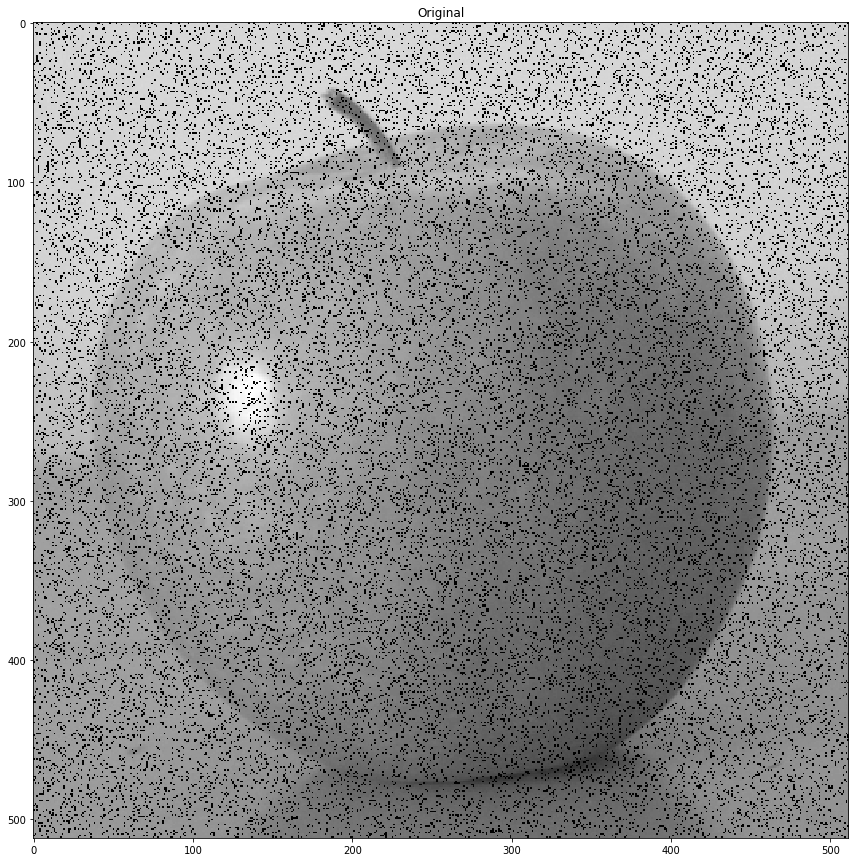

In [2]:
original_img = cv2.imread('../EP2/fruit.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.uint16)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img, cmap='gray')
plt.title('Original')
plt.show()


# Area opening example

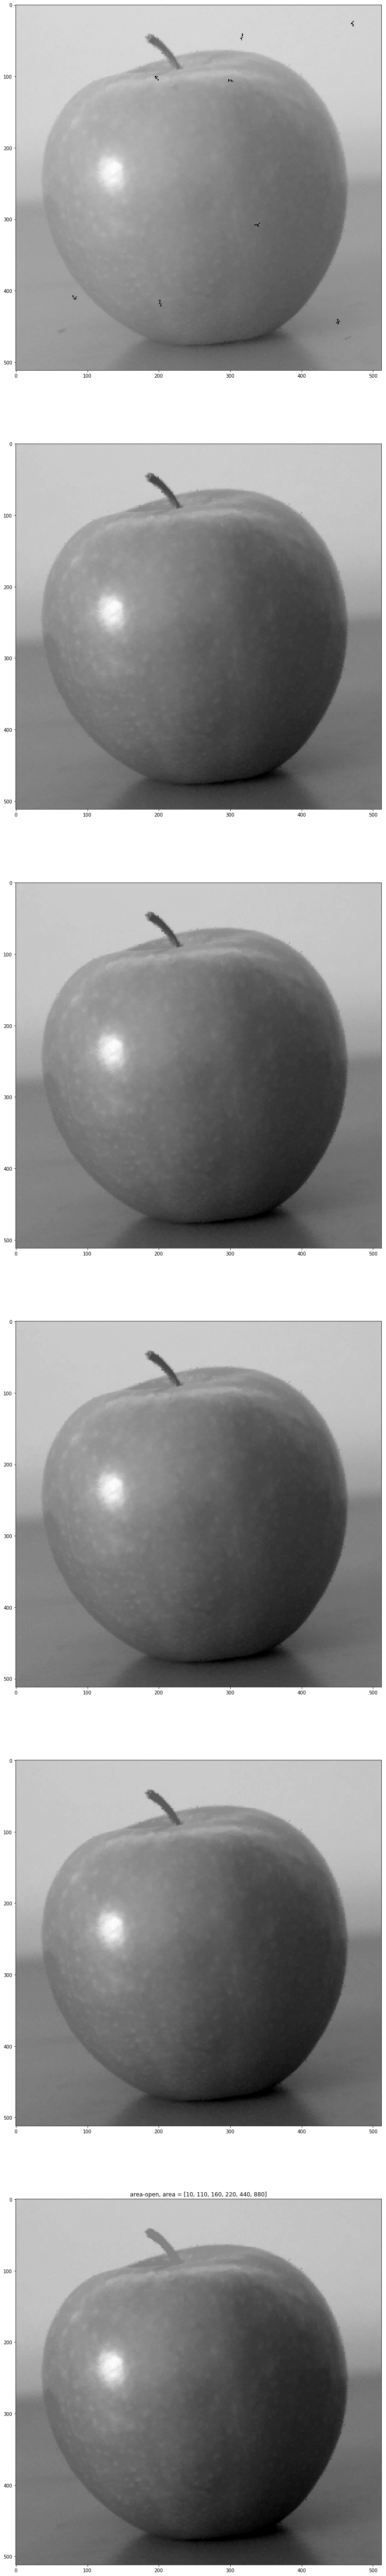

In [19]:
#Structuring element with connectivity-8
neighborhood = np.ones((3,3),dtype = bool)

# Negating the image
img_max = original_img.max()
img_neg = img_max - original_img

areas = [10,110,160,220,440,880]

filtered_images = []

for area in areas:
    #Building the max-tree of the negated image, i.e. min-tree
    mxt_neg = siamxt.MaxTreeAlpha(img_neg, neighborhood)
   
    #Applying an area-open filter
    mxt_neg.areaOpen(area)

    #Recovering the image 
    img_filtered =  mxt_neg.getImage()
    
    # Negating the image back
    img_filtered = img_max - img_filtered

    filtered_images.append(img_filtered)
    
#Displaying the filtered image
fig, imgs = plt.subplots(6,1, figsize=(15,100))
for i in range(len(filtered_images)):
    imgs[i].imshow(filtered_images[i], cmap='gray')
    plt.title("area-open, area = "+ str(areas))
plt.show()
